In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

[[[511 323 577 366]]

 [[305 425 361 388]]

 [[665 427 768 493]]

 [[673 424 720 454]]

 [[279 444 313 420]]

 [[138 538 186 507]]

 [[337 403 372 380]]

 [[181 509 202 496]]

 [[668 424 784 491]]

 [[356 390 380 374]]

 [[530 338 579 366]]

 [[181 510 215 486]]

 [[213 489 227 478]]

 [[233 474 304 427]]

 [[383 372 424 342]]

 [[661 426 665 428]]

 [[559 358 576 368]]

 [[697 438 783 493]]

 [[534 341 575 368]]

 [[230 476 242 469]]

 [[699 448 767 492]]]


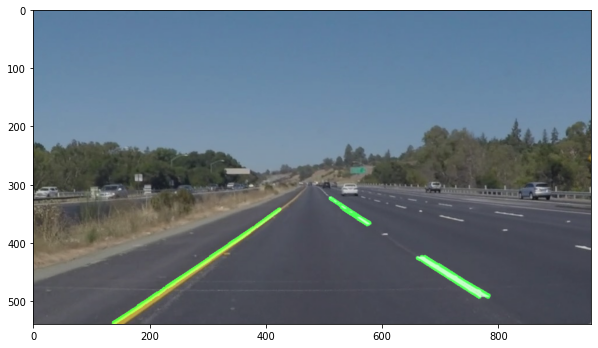

In [18]:

image = cv2.imread('CarND-LaneLines-P1-master/test_images/solidYellowLeft.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


height = image.shape[0]
width = image.shape[1]

roi_vertices = [(0, height),
               (width/2, height/2),
               (width, height)]
def roi_mask(img, points):
    mask = np.zeros_like(img)
    #channel_count = img.shape[2]
    match_mask_color = 255
    cv2.fillPoly(mask, points, match_mask_color)
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image


cropped_image = roi_mask(image, np.array([roi_vertices], np.int32))

gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
canny_image = cv2.Canny(gray_image, 350, 400)


cropped_image = roi_mask(canny_image, np.array([roi_vertices], np.int32))


lines = cv2.HoughLinesP(cropped_image,
                       rho = 6,
                       theta = np.pi / 60,
                       threshold = 50,
                       lines = np.array([]),
                       minLineLength = 1,
                       maxLineGap = 25)
print(lines)

def draw_lines(img, lines):
    img_copy = img.copy()
    line_image = np.zeros((img_copy.shape[0], img_copy.shape[1], img_copy.shape[2]), dtype=np.uint8)
    
    for line in lines:
        for x1, y1, x2, y2 in line:
            cv2.line(line_image, (x1, y1), (x2, y2), (0, 255, 0), 5)
    
    img_copy = cv2.addWeighted(img_copy, 0.8,line_image, 1, 0)
    
    return img_copy


lane_image = draw_lines(image, lines)

plt.figure(figsize=(10,10))
plt.imshow(lane_image)

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
video = cv2.VideoCapture('CarND-LaneLines-P1-master/test_videos/solidYellowLeft.mp4')
while(video.isOpened()):
    _,image = video.read()
    #image = cv2.imread('CarND-LaneLines-P1-master/test_images/solidYellowLeft.jpg')
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


    height = image.shape[0]
    width = image.shape[1]

    roi_vertices = [(0, height),
                   (width/2, height/2),
                   (width, height)]
    def roi_mask(img, points):
        mask = np.zeros_like(img)
        #channel_count = img.shape[2]
        match_mask_color = 255
        cv2.fillPoly(mask, points, match_mask_color)
        masked_image = cv2.bitwise_and(img, mask)
        return masked_image


    cropped_image = roi_mask(image, np.array([roi_vertices], np.int32))

    gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    canny_image = cv2.Canny(gray_image, 350, 400)


    cropped_image = roi_mask(canny_image, np.array([roi_vertices], np.int32))


    lines = cv2.HoughLinesP(cropped_image,
                           rho = 6,
                           theta = np.pi / 60,
                           threshold = 50,
                           lines = np.array([]),
                           minLineLength = 1,
                           maxLineGap = 25)

    def draw_lines(img, lines):
        img_copy = img.copy()
        left = []
        right = []
        line_image = np.zeros((img_copy.shape[0], img_copy.shape[1], img_copy.shape[2]), dtype=np.uint8)

        for line in lines:
            for x1, y1, x2, y2 in line:
                param = np.polyfit((x1,y1),(x2,y2),1)
                print(param)
                if param[0] < 0:
                    left.append((param[0],param[1]))
                else:
                    right.append((param[0],param[1]))
                
                left_average = np.average(left,axis = 0)
                right_average = np.average(right,axis = 0)
                
                print(left_average)
                print(right_average)
                
                #if left_average is not :
#                 empty_array = np.array([])
#                 is_empty = empty_array.size == 0
                
            
                if left_average.size != 0:
                    
                    y1_l = img_copy.shape[0]
                    y2_l = int(y1_l * (3/4))
                
                    x1_l = int((img_copy.shape[0] - left_average[1]) / left_average[0])
                    x2_l = int((y2_l - left_average[1]) / left_average[0])
                
                    cv2.line(line_image, (x1_l, y1_l), (x2_l, y2_l), (0, 255, 0), 5)
        
                
              #  if not np.isnan(right_average):
                if right_average.size != 0:
                
                    y1_r = img_copy.shape[0]
                    y2_r = int(y1_r * (3/4))
                
                    x1_r = int((img_copy.shape[0] - right_average[1]) / right_average[0])
                    x2_r = int((y2_r - right_average[1]) / right_average[0])
                
                    cv2.line(line_image, (x1_r, y1_r), (x2_r, y2_r), (0, 255, 0), 5)

        img_copy = cv2.addWeighted(img_copy, 0.8,line_image, 1, 0)

        return img_copy
    
    lane_image = draw_lines(image, lines)
    
    cv2.imshow('test',lane_image)
    key = cv2.waitKey(20)
    if key == ord('q'):
        break


    

#plt.figure(figsize=(10,10))

video.release()
cv2.destroyAllWindows()


[  0.43062201 213.92822967]
nan
[  0.43062201 213.92822967]


IndexError: invalid index to scalar variable.

In [2]:
video = cv2.VideoCapture('CarND-LaneLines-P1-master/test_videos/solidWhiteRight.mp4')
while(video.isOpened()):
    _,image = video.read()
    cv2.imshow('test',image)
    key = cv2.waitKey(20)
    if key == ord('q'):
        break
    
video.release()
cv2.destroyAllWindows()